In [16]:
import torch

from diffusers import StableDiffusionPipeline, DDIMScheduler

In [57]:
model_path = "/home/ubuntu/model-aabbccddeeffgg/"
token_name = "aabbccddeeffgg"
num_pred_steps = 75
guide = 7.5
ddim = True

if ddim:
    ddim_scheduler = DDIMScheduler(
            beta_start=0.00085,
            beta_end=0.012,
            beta_schedule="scaled_linear",
            clip_sample=False,
            set_alpha_to_one=False,
        )

    pipe = StableDiffusionPipeline.from_pretrained(
        model_path, 
        torch_dtype=torch.float16,
        scheduler=ddim_scheduler,
        safety_checker=None).to("cuda")
else:
    pipe = StableDiffusionPipeline.from_pretrained(
        model_path, 
        torch_dtype=torch.float16,
        safety_checker=None).to("cuda")    

You have passed `None` for safety_checker to disable its functionality in <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'>. Note that this might lead to problems when using <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> and is not recommended.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/75 [00:00<?, ?it/s]

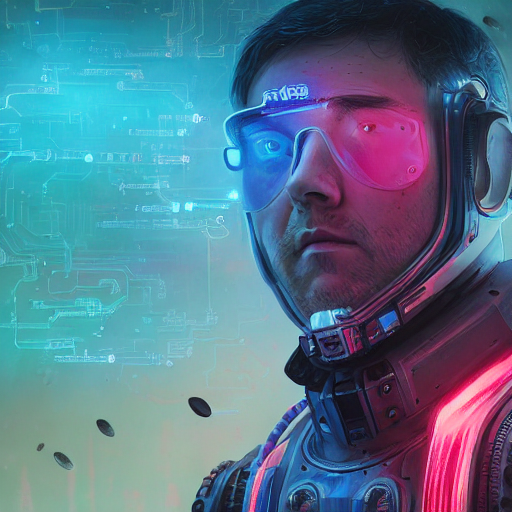

In [64]:
prompt = "colorful cinematic portrait of " + token_name + " person, armor, cyberpunk,background made of brain cells, back light, organic, art by greg rutkowski, ultrarealistic, leica 30mm"
image = pipe(prompt, num_inference_steps=num_pred_steps, guidance_scale=guide).images[0]
display(image)